In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [80]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.frame
print(df.shape) 
print("\nColumn names:")
print(df.columns.tolist())

(20640, 9)

Column names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [81]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [82]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [84]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


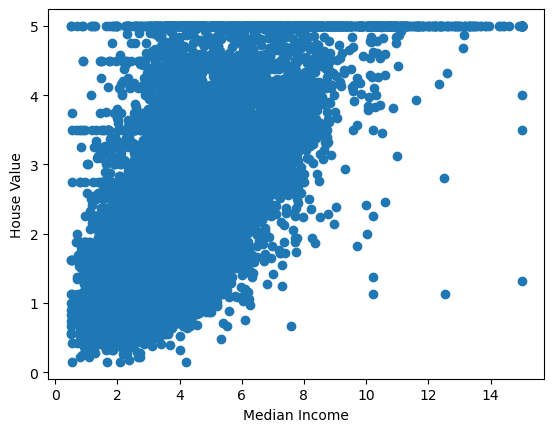

In [85]:
plt.scatter(df['MedInc'], df['MedHouseVal'])
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.show()

In [86]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [87]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


In [88]:
print("Available columns:")
print(df.columns.tolist())

Available columns:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [89]:
df_transformed = df.copy()
columns_to_transform = ['MedInc', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']
for col in columns_to_transform:
    df_transformed[col] = np.log1p(df_transformed[col])

In [90]:
def find_outliers(df,column):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return len(outliers)


In [91]:
# Check outliers before transformation
print("Outliers in Original Data:")
for column_name in df.columns:
    outlier_count = find_outliers(df, column_name)
    print(f"{column_name:<12}: {outlier_count:>4} outliers")

# Check outliers after transformation
print("\nOutliers in Transformed Data:")
for column_name in df_transformed.columns:
    outlier_count = find_outliers(df_transformed, column_name)
    print(f"{column_name:<12}: {outlier_count:>4} outliers")

Outliers in Original Data:
MedInc      :  681 outliers
HouseAge    :    0 outliers
AveRooms    :  511 outliers
AveBedrms   : 1424 outliers
Population  : 1196 outliers
AveOccup    :  711 outliers
Latitude    :    0 outliers
Longitude   :    0 outliers
MedHouseVal : 1071 outliers

Outliers in Transformed Data:
MedInc      :  226 outliers
HouseAge    :    0 outliers
AveRooms    :  511 outliers
AveBedrms   : 1386 outliers
Population  :  848 outliers
AveOccup    :  470 outliers
Latitude    :    0 outliers
Longitude   :    0 outliers
MedHouseVal :    0 outliers


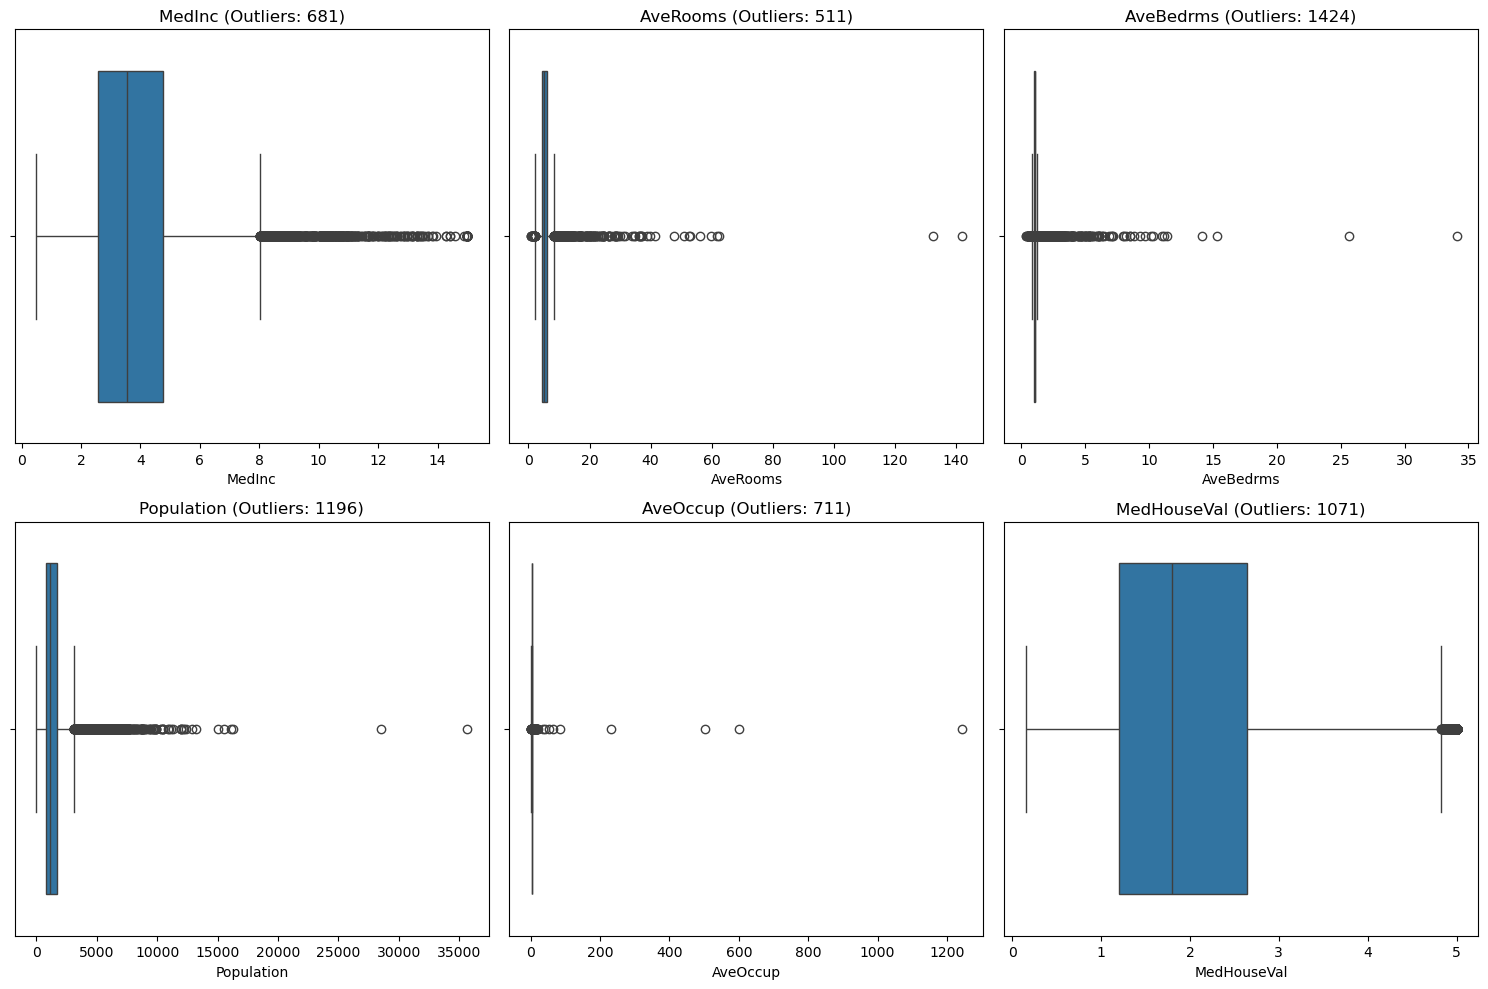

In [92]:


# Assume df is your DataFrame
columns_with_outliers = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

# Create a figure with subplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_with_outliers, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'{col} (Outliers: {find_outliers(df,col)})')
plt.tight_layout()
plt.show()

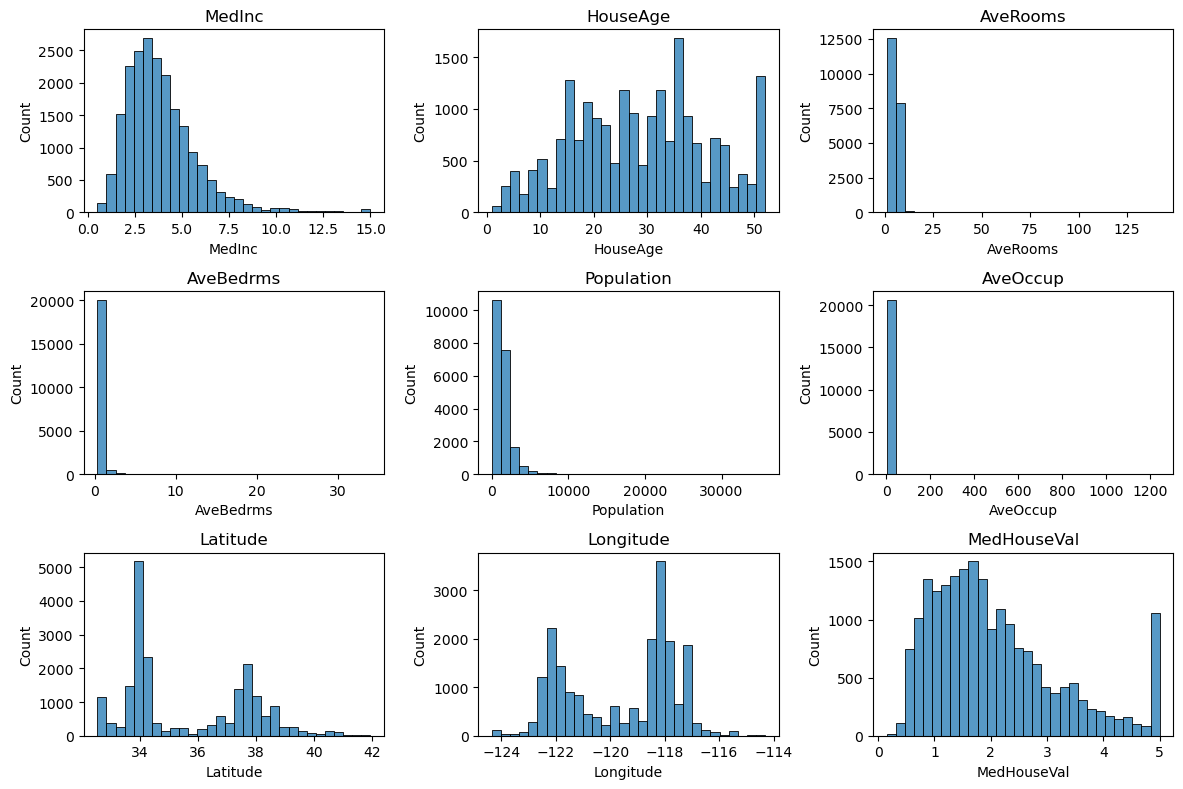

In [93]:

# Histograms for all columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

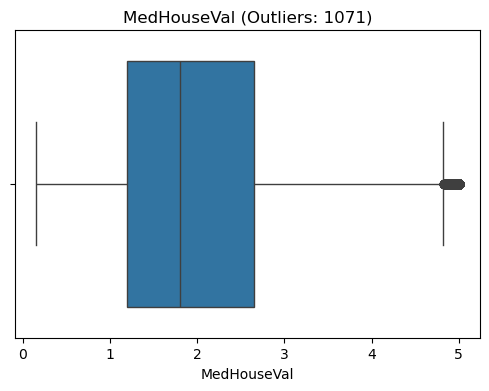

In [94]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['MedHouseVal'])
plt.title(f'MedHouseVal (Outliers: {find_outliers(df, "MedHouseVal")})')
plt.savefig('boxplot_medhouseval.png')
plt.show()

<Axes: xlabel='MedInc', ylabel='Count'>

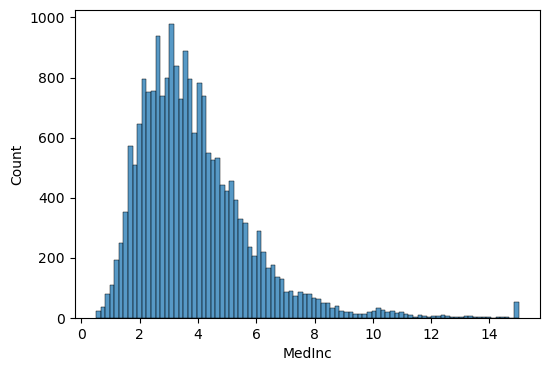

In [95]:
plt.figure(figsize=(6, 4))
sns.histplot(df['MedInc'])


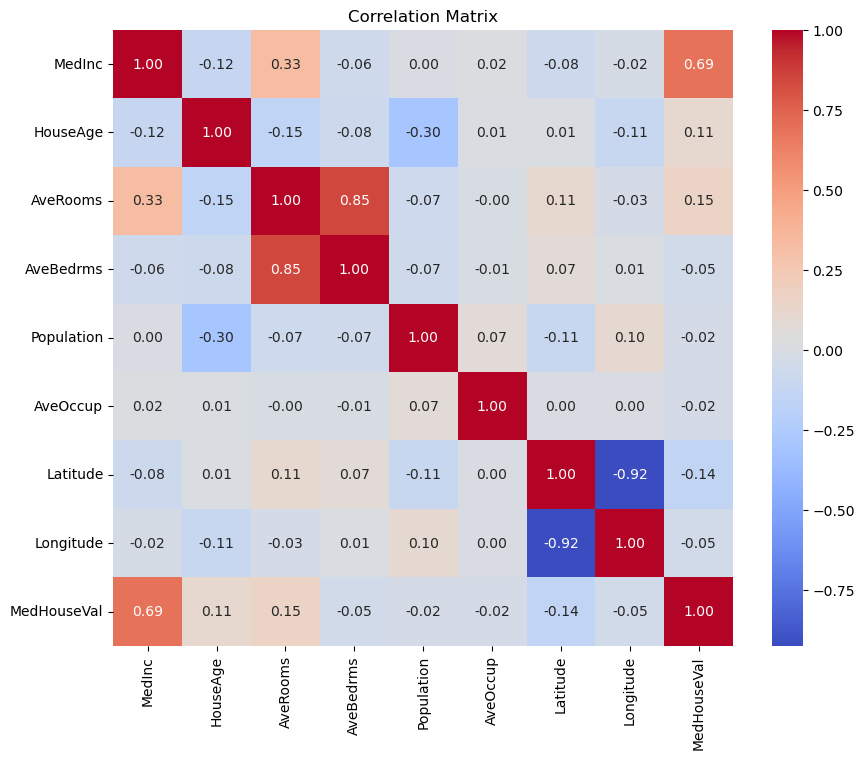

In [96]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('correlation_heatmap.png')  # Save for project
plt.show()

In [97]:
print("\nCorrelations with MedHouseVal:")
print(correlation_matrix['MedHouseVal'].sort_values(ascending=False))


Correlations with MedHouseVal:
MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64


training the model 

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming df_transformed is your DataFrame after log transformation
# Separate features (X) and target (y)
X = df_transformed.drop('MedHouseVal', axis=1)  # All columns except MedHouseVal
y = df_transformed['MedHouseVal']  # Target column

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and calculate RMSE (error)
y_pred = model.predict(X_test)
rmse = (mean_squared_error(y_test, y_pred)) ** 0.5
mae=(mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

print(f"RMSE: {rmse:.3f}")
print(f'mae:{mae:3f}')
   

R² Score: 0.6601486631664693
RMSE: 0.207
mae:0.042836


In [99]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,0.986264,25.0,4.192201,0.704228,7.239215,1.584620,36.06,-119.01
3024,1.261666,30.0,5.039384,0.785495,7.356280,1.302857,35.14,-119.46
15663,1.499645,52.0,3.977155,0.782017,7.178545,0.858802,37.80,-122.44
20484,1.907704,17.0,6.163636,0.703198,7.441907,1.491655,34.28,-118.72
9814,1.552868,34.0,5.492991,0.707069,6.969791,1.248079,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,1.723659,16.0,7.002212,0.725794,7.209340,1.383525,33.36,-117.22
16623,1.315496,28.0,6.131915,0.813920,7.409136,1.206098,35.36,-120.83
18086,2.325305,25.0,7.237676,0.666384,7.368970,1.332496,37.31,-122.05
2144,1.331046,36.0,5.289030,0.684673,7.113142,1.277764,36.77,-119.76


In [100]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,1.449175,33.0,5.017657,0.696352,7.741099,1.545819,32.71,-117.03
8267,1.571217,49.0,4.473545,0.713442,7.181592,1.007263,33.77,-118.16
17445,1.640219,4.0,5.645833,0.685679,6.820016,1.314587,34.66,-120.48
14265,1.079260,36.0,4.002817,0.709907,7.257708,1.608311,32.69,-117.11
2271,1.516050,43.0,6.268421,0.758097,6.774224,1.193922,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,1.997418,35.0,6.129032,0.655584,6.490724,1.394327,33.78,-117.96
11964,1.398717,33.0,6.868597,0.819554,7.469654,1.590098,34.02,-117.43
5390,1.369758,36.0,3.986717,0.732222,7.471363,1.466045,34.03,-118.38
860,1.904969,15.0,6.395349,0.726572,7.483244,1.430046,37.58,-121.96


In [103]:
y_pred

array([0.47418953, 1.01228507, 1.4259729 , ..., 1.63942396, 0.81077681,
       1.00008049])

In [104]:
y_train

14196    0.708036
8267     1.572981
17445    1.002835
14265    0.659590
2271     0.675492
           ...   
11284    1.191495
11964    0.682086
5390     1.169692
860      1.344169
15795    1.446919
Name: MedHouseVal, Length: 16512, dtype: float64

In [105]:
y_test

20046    0.390013
3024     0.377066
15663    1.791761
20484    1.158766
9814     1.329724
           ...   
15362    1.290059
16623    1.299647
18086    1.791761
2144     0.544067
3665     0.922273
Name: MedHouseVal, Length: 4128, dtype: float64

In [106]:
y_pred_dollars = np.expm1(y_pred)

In [108]:
y_pred_dollars

array([0.60671149, 1.75188209, 3.16190501, ..., 4.15220077, 1.24965485,
       1.71850064])

In [109]:
y_test_dollars = np.expm1(y_test)
y_test_dollars

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: MedHouseVal, Length: 4128, dtype: float64

In [112]:

comparison = np.concatenate((y_test_dollars.values.reshape(-1,1), y_pred_dollars.reshape(-1,1)), axis=1)
print(comparison[:10])   # show first 10 actual vs predicted


[[0.477      0.60671149]
 [0.458      1.75188209]
 [5.00001    3.16190501]
 [2.186      2.63443482]
 [2.78       2.79107273]
 [1.587      1.94664357]
 [1.982      2.55785968]
 [1.575      1.90732102]
 [3.4        2.91311148]
 [4.466      3.65335563]]


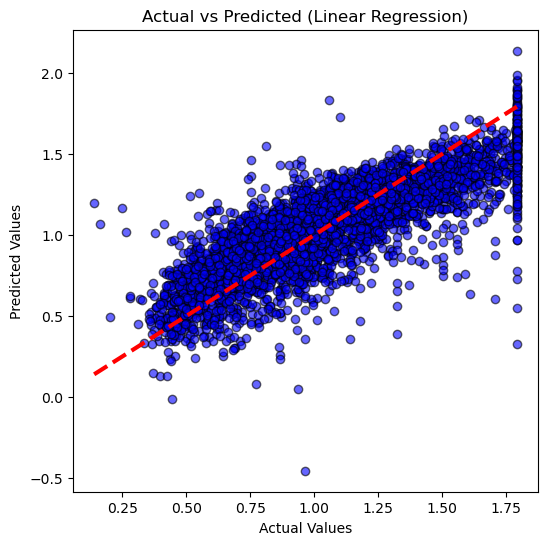

In [123]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=3)  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()